# Ejercicio de aplicación: métodos de regresión con bases de datos reales.
<hr/>
Para este ejercicio usaremos una base de datos disponible gracias al **[Laboratory of Artificial Intelligence and Decision Support (LIAAD)](http://www.liaad.up.pt)** de la Universidad de Porto en Portugal. Los detalles específicos sobre esta base de datos se pueden encontrar en el archivo *Readme.txt* (ver la sección **Dataset Characteristics**). 

#### Introducción:
<hr/>
Los sistemas de bicicletas compartidas son una nueva generación de alquiler de bicicletas tradicionales donde todo el proceso de membresía, alquiler y devolución se ha vuelto automático. A través de estos sistemas, el usuario puede alquilar una bicicleta fácilmente desde un lugar particular y regresarla
de vuelta en otro. En la actualidad, hay alrededor de 500 programas de bicicletas compartidas en todo el mundo que se componen de
más de 500 mil bicicletas. Hoy en día, existe un gran interés en estos sistemas debido a su importante papel en el tráfico,
problemas ambientales y de salud.

Además de las interesantes aplicaciones en el mundo real de los sistemas de intercambio de bicicletas, las características de los datos que se generan a partir de estos sistemas los hacen atractivos para la investigación. Opuesto a otros servicios de transporte como el autobús o el metro, la duración
de la posición de viaje, partida y llegada se registra explícitamente en estos sistemas. Esta característica convierte el sistema de intercambio de bicicletas en
una red de sensores virtuales que se puede usar para detectar la movilidad en la ciudad. Por lo tanto, se espera que la mayoría de los eventos importantes en la ciudad puedan detectarse a través del monitoreo de estos datos.

#### Sobre la base de datos
<hr/>

El proceso de alquiler de bicicletas compartidas está altamente correlacionado con la configuración ambiental y estacional. Por ejemplo, las condiciones climáticas,
la precipitación, el día de la semana, la estación, la hora del día, etc. pueden afectar las conductas de alquiler. El conjunto de datos básicos está relacionado con
el registro histórico de dos años (2011 y 2012 del sistema Capital Bikeshare, Washington D.C., EE. UU., que esta
públicamente disponible en http://capitalbikeshare.com/system-data). 

**Para esta base de datos particular nos enfocaremos en usar modelos de regresión lineal para predecir la tasa de renta de bicicletas en terminos semanales y diarios.**

En esta carpeta se encuentran dos bases de datos: una registra cambios en los registros de bicicletas a cada hora **(hour.csv - 17379 registros)** y la otra registra cambios en los registros de bicicletas a cada dia **(day.csv - 731 registros)**


In [40]:
# el siguiente video directo es tomado del canal 
# en youtube de Capital BikeShare.
from IPython.display import HTML
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/LUUpSm3Zq_A" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe></center>')

#### Detalle de las variables
<hr/>
* *instant*: record index - **(indice del registro)**
* *dteday*: date - **(fecha)**
* *season* : season (1:springer, 2:summer, 3:fall, 4:winter) - **estación (1:primavera, 2:verano, 3:otoño, 4:invierno)**
* *yr* : year (0: 2011, 1:2012) - **año (0:2011, 1:2012)**
* *mnth* : month ( 1 to 12) - **mes (1 al 12)**
* *hr* : hour (0 to 23) - **hora (0 a 23)**
* *holiday* : wether day is holiday or not - **cuando el día es festivo o no** (tomado de http://dchr.dc.gov/page/holiday-schedule)
* *weekday* : day of the week - **(día de la semana)**
* *workingday* : if day is neither weekend nor holiday is 1, otherwise is 0 - **(0: día festivo ó fin de semana, 1: día laboral)**
* *weathersit* : **(condiciones climaticas)** 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* *temp* : Normalized temperature in Celsius. The values are divided to 41 (max) - **(temperatura normalizada, el valor máximo de 1.0 corresponde a 41ºC)**
* *atemp*: Normalized feeling temperature in Celsius. The values are divided to 50 (max) - **(sensación térmica normalizada, el valor máximo de 1.0 corresponde a 50ºC)**
* *hum*: Normalized humidity. The values are divided to 100 (max) - **(humedad relativa normalizada, el valor máximo corresponde a 100)**
* *windspeed*: Normalized wind speed. The values are divided to 67 (max) - **(velocidad del viento normalizada, el valor máximo corresponde a 67)**
* *casual*: count of casual users - **(conteo de usuarios ocasionales)**
* *registered*: count of registered users - **(conteo de usuarios registrados)**
* *cnt*: count of total rental bikes including both casual and registered - **(conteo total de bicicletas rentadas tanto de usuarios ocasionales como registrados)**

<hr/>

#### 1) Importamos las bibliotecas necesarias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 2) Importamos la base de datos 'day.csv' usando pandas:

In [2]:
dat = pd.read_csv('day.csv')
dat.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 3) Con seaborn realizamos un grafico de todas las correlaciones de la base de datos: 

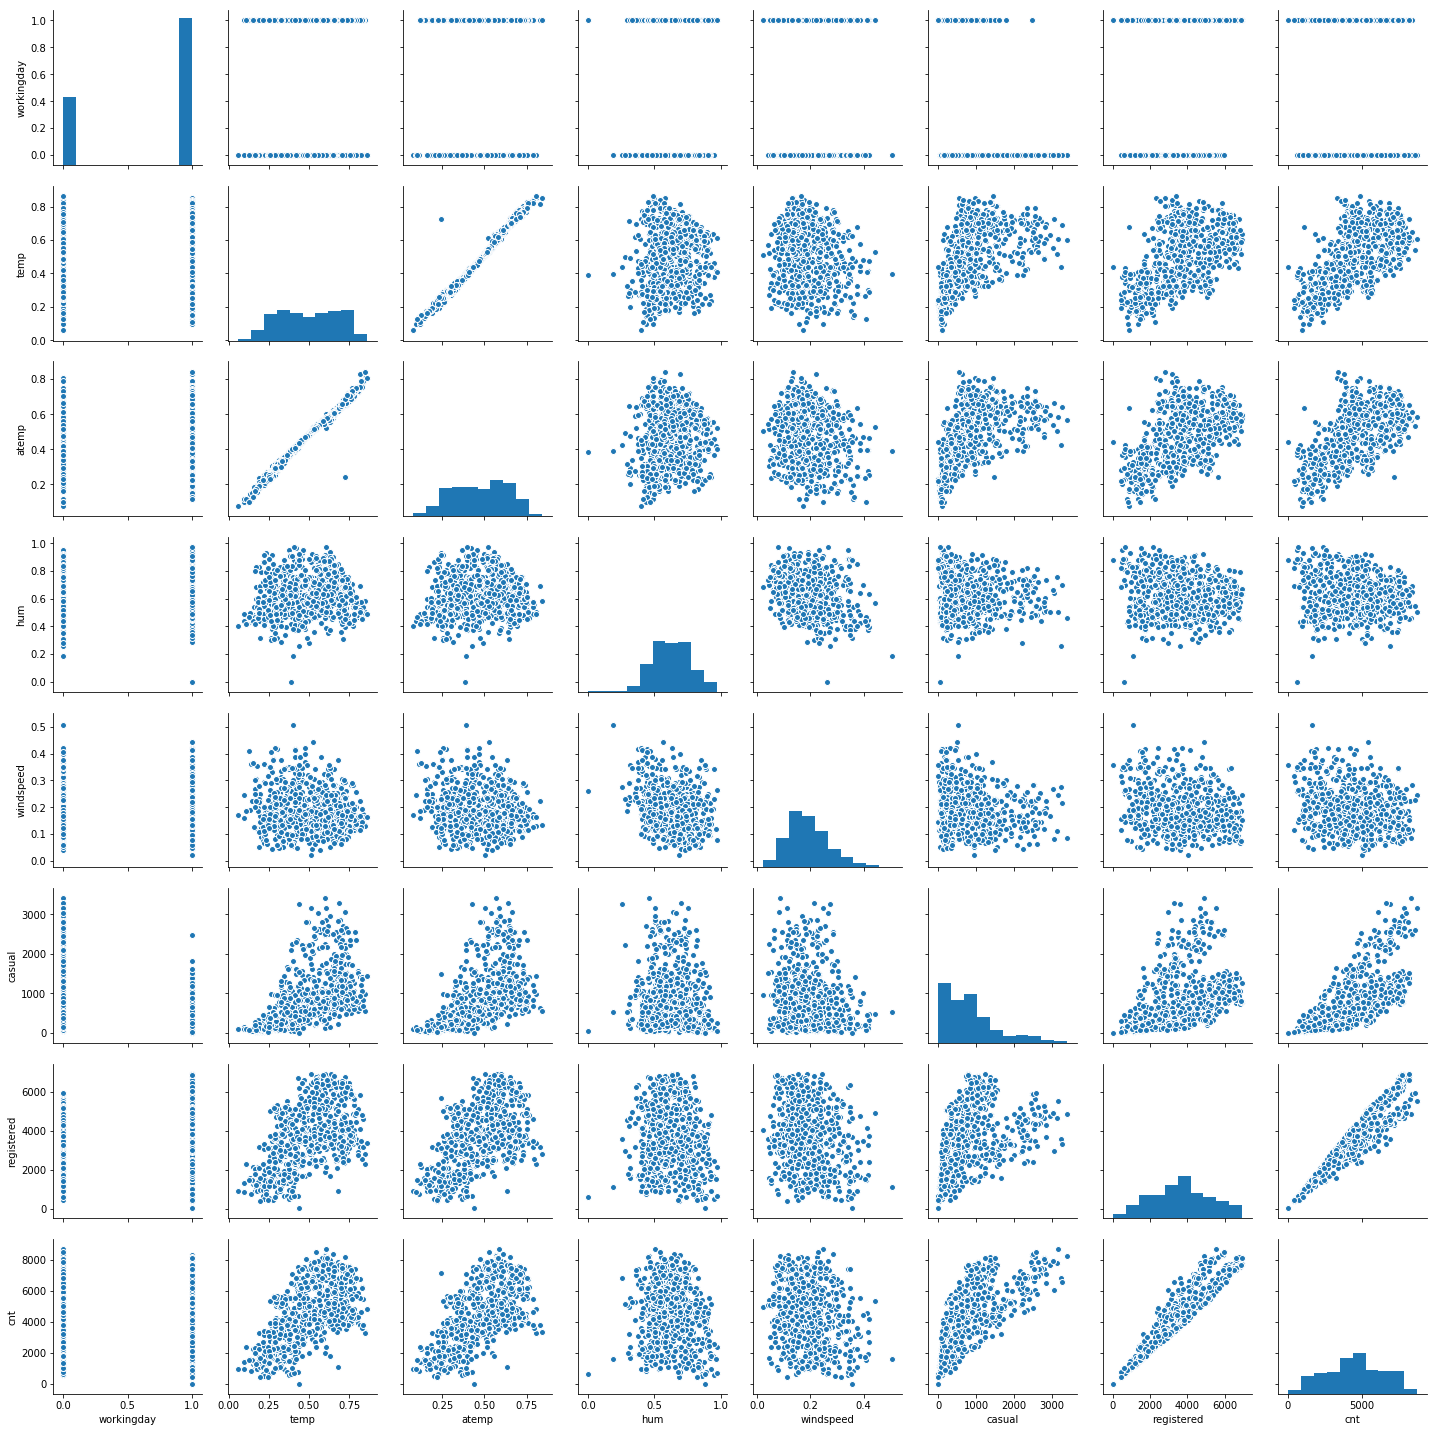

In [4]:
sns.pairplot(dat[['workingday','temp','atemp','hum','windspeed','casual','registered','cnt']])

#### 4) Del gráfico anterior observamos una clarísima correlacion lineal entre "cnt" y "registered". Así que hacemos un gráfico aislado de estas dos variables solamente: 

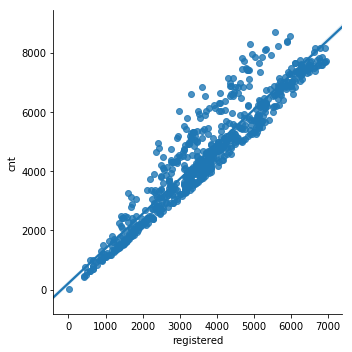

In [5]:
sns.lmplot("registered","cnt",data=dat)

#### 5) Sin embargo parece que hay un conjunto de datos que se separa de la tendencia dominante, es posible que haya dos tendencias separadas superpuestas, probablemente se puedan diferenciar si consideramos los dias festivos aparte: 

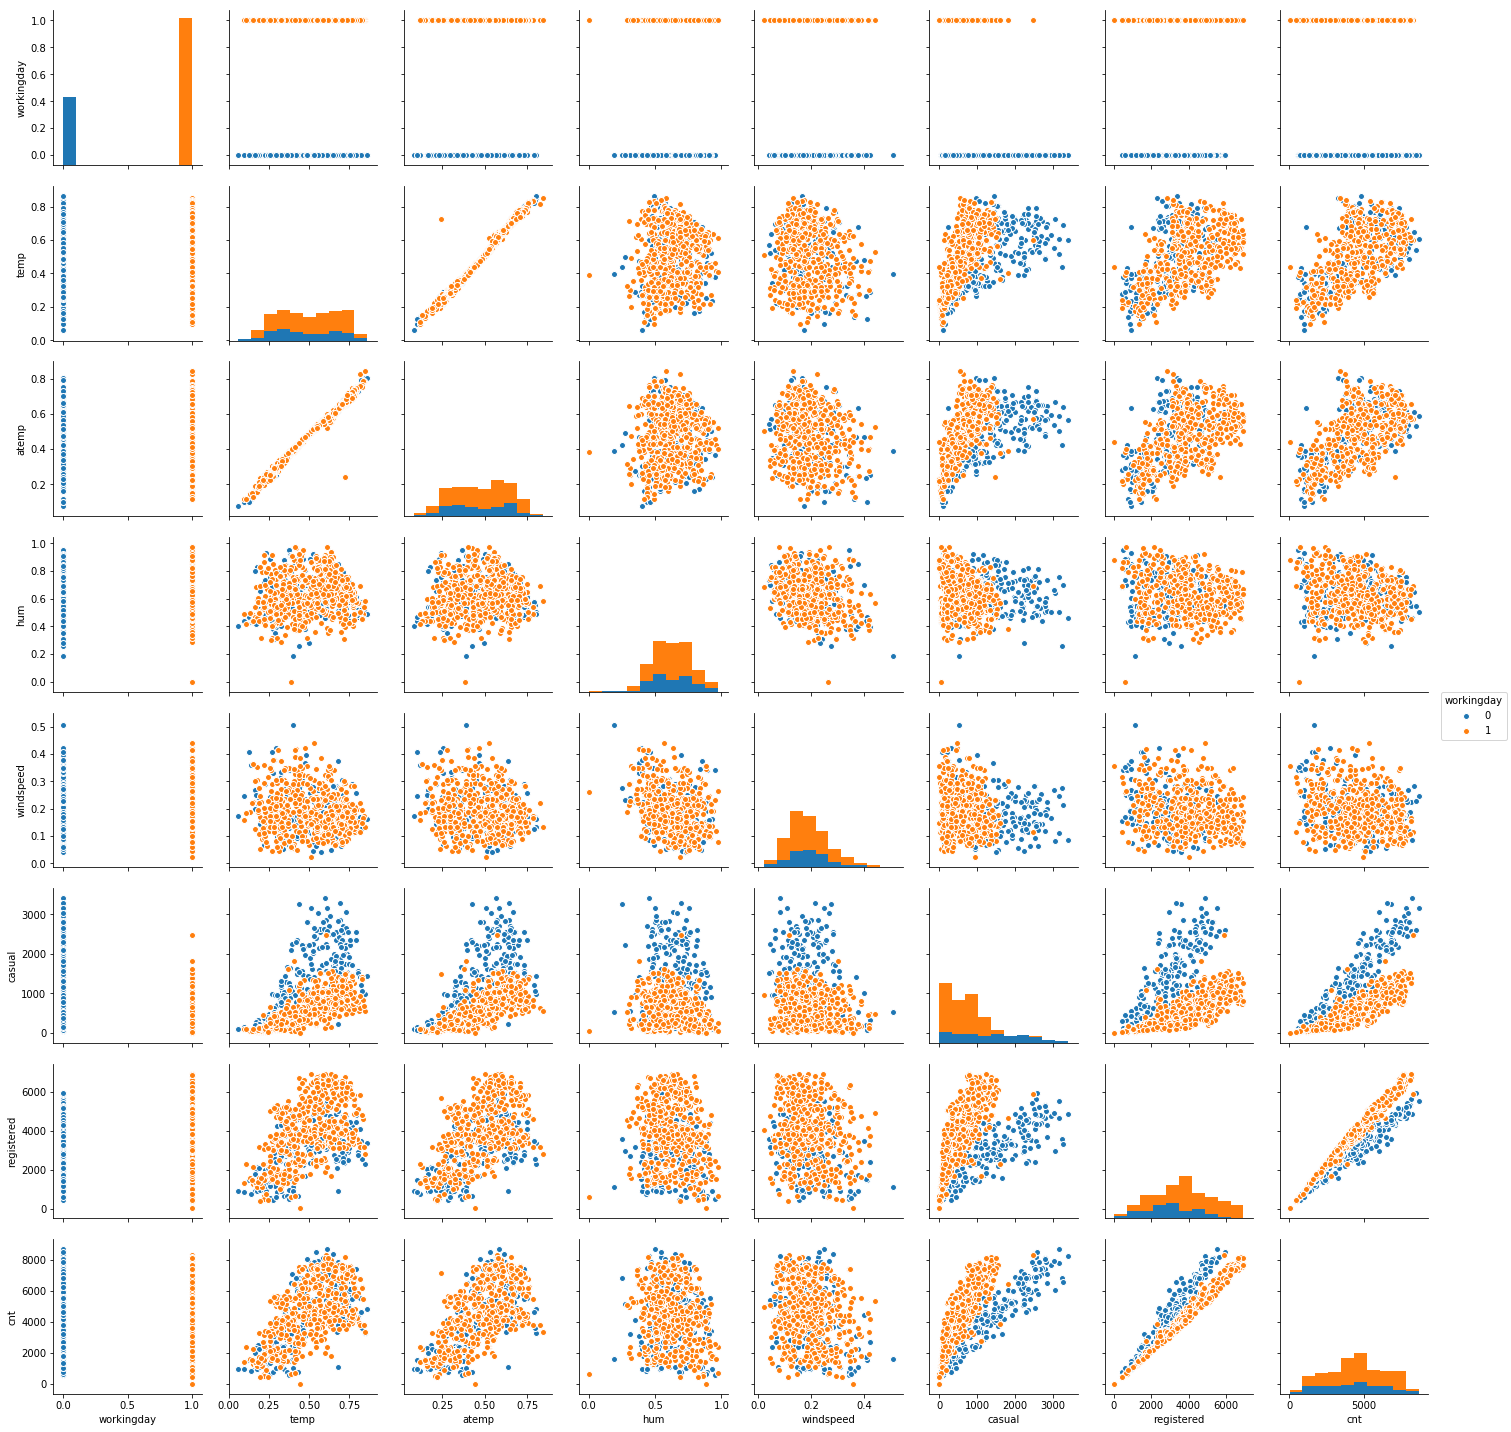

In [6]:
sns.pairplot(dat[['workingday','temp','atemp','hum','windspeed','casual','registered','cnt']],hue='workingday')

#### 6) Ahora es claro que hay dos tendencias separadas con las variables "casual" y "registered". Grafiquemos tendencias separadas para estas dos variables y su relacion con "cnt".

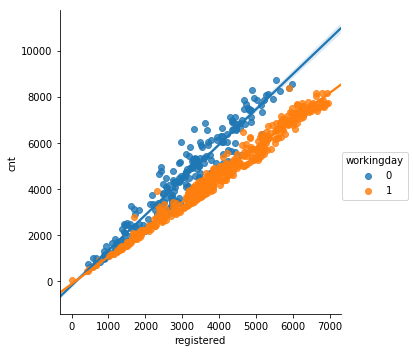

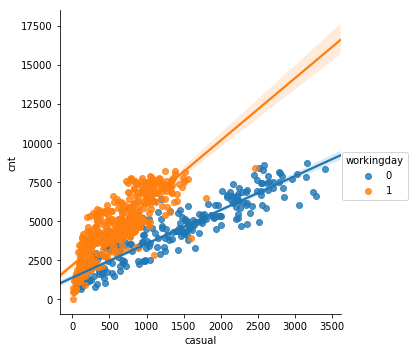

In [7]:
sns.lmplot("registered","cnt",data=dat,hue='workingday')
sns.lmplot("casual","cnt",data=dat,hue='workingday')

#### 7) **¿Que análisis puede extraer de las gráficas anteriores?, Compare las tendencias para los casos de usuarios ocasionales y usuarios registrados respecto al numéro de bicicletas rentadas por dia.**

<hr/>
#### 8) Usaremos ahora nuestro codigo "custom" -> "reg_method.py" (esta version es ligeramente diferente de la usada en el módulo avanzado de regresión) para calcular por regresión lineal modelos que ajusten los datos en cada caso (consideramos cuatro casos): 

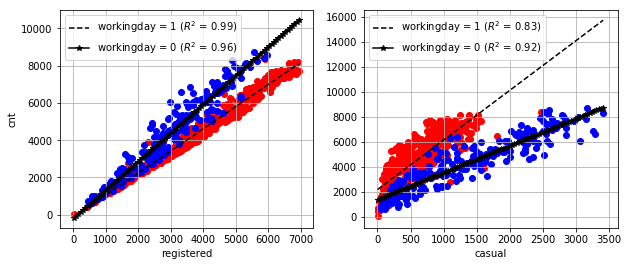

In [3]:
import reg_method as rg
lista1 = rg.reshape_data('registered','cnt',dat[dat['workingday']==1])
lista2 = rg.reshape_data('registered','cnt',dat[dat['workingday']==0])
lista3 = rg.reshape_data('casual','cnt',dat[dat['workingday']==1])
lista4 = rg.reshape_data('casual','cnt',dat[dat['workingday']==0])
    
# calculamos los coeficientes para cada modelo:
cfs1 = rg.totals(lista1)
cfs2 = rg.totals(lista2)
cfs3 = rg.totals(lista3)
cfs4 = rg.totals(lista4)
# calculamos el modelo para cada caso:
model1 = rg.mincua_linear(cfs1)
r2_1   = rg.r2(cfs1) 
model2 = rg.mincua_linear(cfs2)
r2_2   = rg.r2(cfs2)
model3 = rg.mincua_linear(cfs3)
r2_3   = rg.r2(cfs3)
model4 = rg.mincua_linear(cfs4)
r2_4   = rg.r2(cfs4)

# graficamos los modelos:
plt.figure(figsize=(10,4))
plt.subplot(121)
for p in lista1:
    plt.scatter(p[0],p[1],c= 'r')
for p in lista2:
    plt.scatter(p[0],p[1],c= 'b')
xx  = np.linspace(min(dat['registered']),max(dat['registered']),100)
yy1 = model1(xx)
yy2 = model2(xx)
plt.plot(xx,yy1,'--k',label='workingday = 1'+r' ($R^2$ = '+str(round(r2_1,2))+')')
plt.plot(xx,yy2,'*-k',label='workingday = 0'+r' ($R^2$ = '+str(round(r2_2,2))+')')
plt.xlabel('registered')
plt.ylabel('cnt')
plt.grid(True)
plt.legend()

plt.subplot(122)
for p in lista3:
    plt.scatter(p[0],p[1],c= 'r')
for p in lista4:
    plt.scatter(p[0],p[1],c= 'b')
xx  = np.linspace(min(dat['casual']),max(dat['casual']),100)
yy1 = model3(xx)
yy2 = model4(xx)
plt.plot(xx,yy1,'--k',label='workingday = 1'+r' ($R^2$ = '+str(round(r2_3,2))+')')
plt.plot(xx,yy2,'*-k',label='workingday = 0'+r' ($R^2$ = '+str(round(r2_4,2))+')')
plt.xlabel('casual')
plt.grid(True)
plt.legend()

#### 9) Para usar scikit-learn debemos reformar la estructura de datos a la cual se le va a aplicar la regresion lineal [(ver documentacion)](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares). 

* Para reformar los datos usaremos la nueva funcion **reshape_scikit()** contenida en "reg_method.py" 
* Para los modelos lineales y los coeficientes de correlacion usaremos **sklearn.linear_model** y **sklearn.metrics.r2_score** 

In [21]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import reg_method as rg

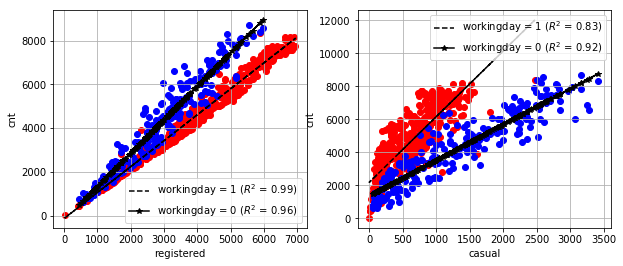

In [31]:
# para usar scikit-learn debemos reformar 
# la estructura de datos a la cual se le va 
# a aplicar la regresion lineal.
xdat1, ydat1 = rg.reshape_scikit(['registered'],'cnt',dat[dat['workingday']==1])
xdat2, ydat2 = rg.reshape_scikit(['registered'],'cnt',dat[dat['workingday']==0])
xdat3, ydat3 = rg.reshape_scikit(['casual'],'cnt',dat[dat['workingday']==1])
xdat4, ydat4 = rg.reshape_scikit(['casual'],'cnt',dat[dat['workingday']==0])

mod1 = linear_model.LinearRegression()
mod2 = linear_model.LinearRegression()
mod3 = linear_model.LinearRegression()
mod4 = linear_model.LinearRegression()

mod1.fit(xdat1,ydat1)
mod2.fit(xdat2,ydat2)
mod3.fit(xdat3,ydat3)
mod4.fit(xdat4,ydat4)

# graficamos los modelos:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(xdat1,ydat1,c= 'r')
plt.scatter(xdat2,ydat2,c= 'b')
yy1 = mod1.predict(xdat1)
yy2 = mod2.predict(xdat2)
r2_1=np.sqrt(r2_score(ydat1,yy1))
r2_2=np.sqrt(r2_score(ydat2,yy2))
plt.plot(xdat1,yy1,'--k',label='workingday = 1'+r' ($R^2$ = '+str(round(r2_1,2))+')')
plt.plot(xdat2,yy2,'*-k',label='workingday = 0'+r' ($R^2$ = '+str(round(r2_2,2))+')')
plt.xlabel('registered')
plt.ylabel('cnt')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.scatter(xdat3,ydat3,c= 'r')
plt.scatter(xdat4,ydat4,c= 'b')
yy3 = mod3.predict(xdat3)
yy4 = mod4.predict(xdat4)
r2_3=np.sqrt(r2_score(ydat3,yy3))
r2_4=np.sqrt(r2_score(ydat4,yy4))
plt.plot(xdat3,yy3,'--k',label='workingday = 1'+r' ($R^2$ = '+str(round(r2_3,2))+')')
plt.plot(xdat4,yy4,'*-k',label='workingday = 0'+r' ($R^2$ = '+str(round(r2_4,2))+')')
plt.xlabel('casual')
plt.ylabel('cnt')
plt.grid(True)
plt.legend()

### Preguntas finales:
<hr/>
#### 1) Escriba código que le permita ver la ecuación matemática del modelo lineal en cada uno de los cuatro casos anteriores.
#### 2) ¿Como podría usar la información obtenida de los modelos lineales para beneficio de la empresa Capital Bikeshare?
#### 3) ¿Puede a a partir del análisis anterior extraer alguna conclusion sobre la movilidad de la ciudad?


### Ejercicio extra-clase
<hr/>
#### Realice un análisis similar al anterior pero ahora usando el archivo **"hour.csv"**. Obtenga modelos lineales que considere relevantes y extraiga informacion valiosa de los mismos. ¿nota diferencias en este caso respecto al analisis aqui realizado?